### Personal Finance Tracker - Beginner Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('transactions.csv')
print("First Five transactions:")
df.head()

First Five transactions:


,Date,Description,Category,Amount,Type
0,2024-01-05,Walmart Grocery,Groceries,125.50,Expense
1,2024-01-06,Salary Deposit,Income,3500.00,Income
2,2024-01-08,Netflix Subscription,Entertainment,15.99,Expense
3,2024-01-10,Electric Bill,Utilities,89.00,Expense
4,2024-01-12,Amazon Purchase,Shopping,45.99,Expense


In [2]:
print('\nDataSet Shape:')
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

print('\nColumns Information:')
print(df.info())

print('\nMissing Values:')
print(df.isnull().sum())

print('\nBasic Statistics:')
print(df.describe())


DataSet Shape:
Rows: 35
Columns: 5

Columns Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         35 non-null     object 
 1   Description  35 non-null     object 
 2   Category     35 non-null     object 
 3   Amount       35 non-null     float64
 4   Type         35 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.5+ KB
None

Missing Values:
Date           0
Description    0
Category       0
Amount         0
Type           0
dtype: int64

Basic Statistics:
            Amount
count    35.000000
mean    371.750286
std     847.613740
min       8.500000
25%      33.500000
50%      65.000000
75%     137.750000
max    3500.000000


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

df['Month_Name'] = df['Date'].dt.month_name()

print('Data after adding data features:')
print(df[['Date','Month', 'Month_Name']].head())

print('\nUpdated data types:')
print(df.dtypes)

Data after adding data features:
        Date  Month Month_Name
0 2024-01-05      1    January
1 2024-01-06      1    January
2 2024-01-08      1    January
3 2024-01-10      1    January
4 2024-01-12      1    January

Updated data types:
Date           datetime64[ns]
Description            object
Category               object
Amount                float64
Type                   object
Month                   int32
Month_Name             object
dtype: object


In [4]:
income_df = df[df['Type']=='Income']

expense_df = df[df['Type']=='Expense']

total_income = income_df['Amount'].sum()
total_expense = expense_df['Amount'].sum()
net_saving = total_income - total_expense

print('Financial Summary:')
print('\nTotal Income:',total_income)
print('\nTotal Spending:',total_expense)
print(f'\nNet Saving: {net_saving:,.2f}')

Financial Summary:

Total Income: 7500.0

Total Spending: 5511.26

Net Saving: 1,988.74


In [5]:
#group expense by category
category_spending = expense_df.groupby('Category')['Amount'].sum()

# sorting values
category_spending = category_spending.sort_values(ascending=False)


for category, amount in category_spending.items():
    percentage = (amount/total_expense) * 100
    print(f'{category:20s} {amount:8.2f} ({percentage:.1f}%)')


Housing               3600.00 (65.3%)
Groceries              491.05 (8.9%)
Utilities              281.00 (5.1%)
Shopping               244.24 (4.4%)
Health & Fitness       242.00 (4.4%)
Education              234.00 (4.2%)
Entertainment          153.97 (2.8%)
Food & Dining          146.50 (2.7%)
Transportation         118.50 (2.2%)


In [6]:
# group expenses by month
monthly_spending = expense_df.groupby('Month_Name')['Amount'].sum()

month_order = ['January', 'February', 'March']
monthly_spending = monthly_spending.reindex(month_order)

print('Monthly Spending:')
for month , amount in monthly_spending.items():
    print(f'{month:15s} {amount:8.2f}')


avg_monthly_spending = monthly_spending.mean()
print(f'Average Monthly Spending: {avg_monthly_spending:,.2f}')

Monthly Spending:
January          1727.23
February         1819.74
March            1964.29
Average Monthly Spending: 1,837.09


### Visualizations

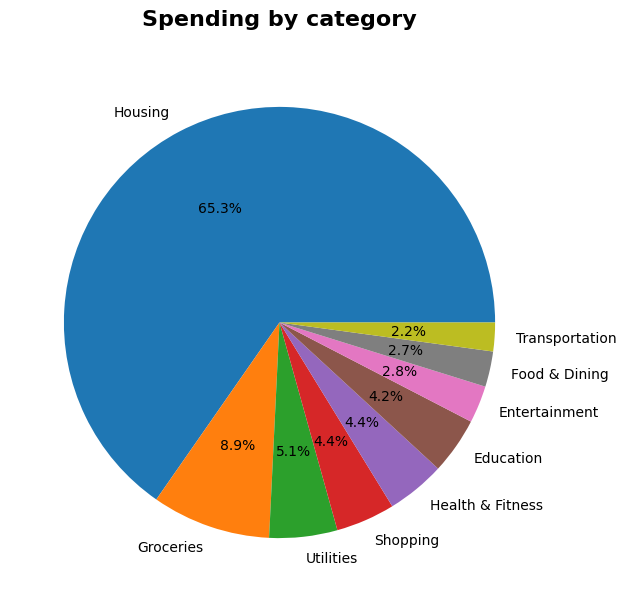

In [7]:
#create pie chart for category spending
plt.figure(figsize=(10,7))

plt.pie(category_spending,labels=category_spending.index,autopct='%1.1f%%')
plt.title('Spending by category', fontsize=16, fontweight='bold', pad=20)
plt.show()

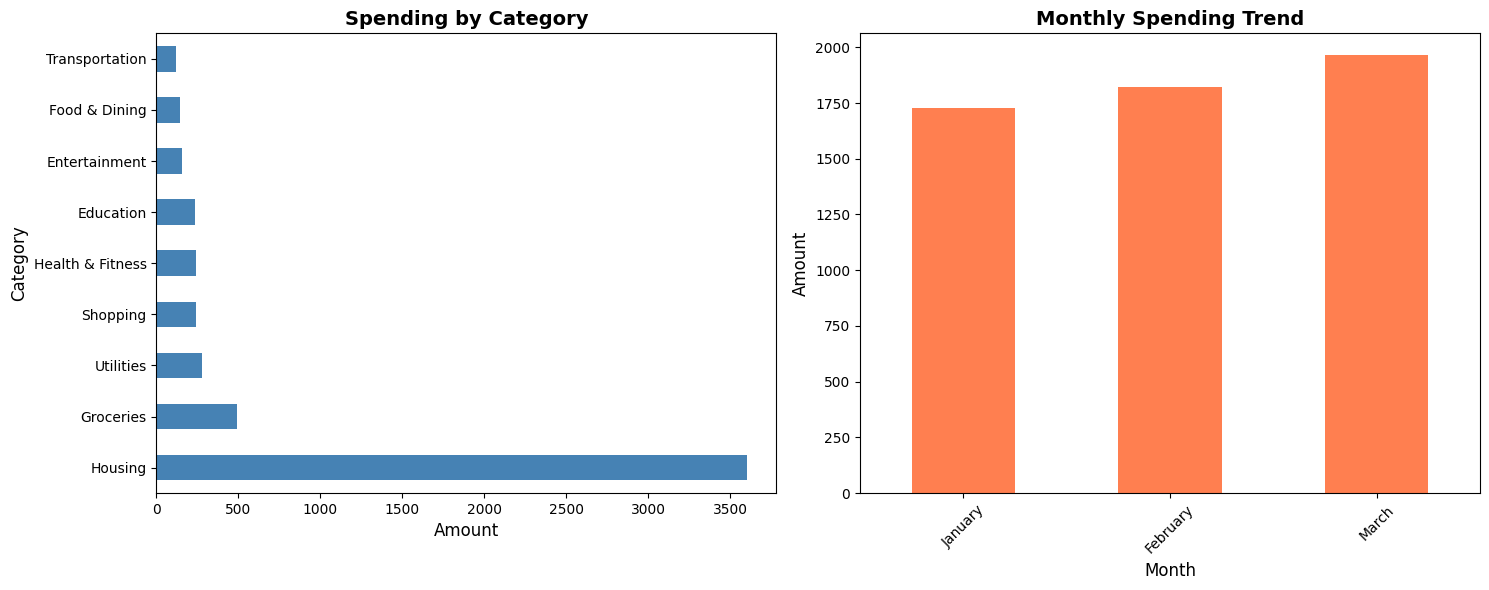

In [8]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1,2, figsize=(15,6))

#chart 1: category spending
category_spending.plot(kind='barh',ax=axes[0], color='steelblue')
axes[0].set_title('Spending by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Amount',fontsize=12)
axes[0].set_ylabel('Category',fontsize=12)

#chart 2: monthly spending
monthly_spending.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Monthly Spending Trend', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Amount', fontsize=12)
axes[1].tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# Get top 10 largest expenses
top_expenses = expense_df.nlargest(10,'Amount')
for idx, row in top_expenses.iterrows():
    print(f"{row['Date'].strftime('%Y-%m-%d'):<12} {row['Description']:<25} {row['Category']:<20} ${row['Amount']:>9.2f}")

2024-01-18   Rent Payment              Housing              $  1200.00
2024-02-15   Rent Payment              Housing              $  1200.00
2024-03-15   Rent Payment              Housing              $  1200.00
2024-02-10   Online Course             Education            $   199.00
2024-03-12   Costco Shopping           Groceries            $   156.80
2024-03-18   Dentist Appointment       Health & Fitness     $   150.00
2024-01-05   Walmart Grocery           Groceries            $   125.50
2024-03-25   Clothing Store            Shopping             $   120.00
2024-02-25   Grocery Store             Groceries            $   110.00
2024-02-03   Whole Foods               Groceries            $    98.75


In [16]:
# Get the top 10 largest expenses in our dataset
top_expenses  = expense_df.nlargest(10, 'Amount')

print('\n Top 10 Largest Expenses:')

print(f'{'Date':<20}{'Description':<20}{'Category':<20}{'Amount':>15}')

for idx, row in top_expenses.iterrows():
    print(f'{row['Date'].strftime('%Y-%m-%d'):<20}{row['Description']:<20}{row['Category']:<20}{row['Amount']:>15}')
 
    


 Top 10 Largest Expenses:
Date                Description         Category                     Amount
2024-01-18          Rent Payment        Housing                      1200.0
2024-02-15          Rent Payment        Housing                      1200.0
2024-03-15          Rent Payment        Housing                      1200.0
2024-02-10          Online Course       Education                     199.0
2024-03-12          Costco Shopping     Groceries                     156.8
2024-03-18          Dentist Appointment Health & Fitness              150.0
2024-01-05          Walmart Grocery     Groceries                     125.5
2024-03-25          Clothing Store      Shopping                      120.0
2024-02-25          Grocery Store       Groceries                     110.0
2024-02-03          Whole Foods         Groceries                     98.75


In [29]:
#Average expenses
category_stats = expense_df.groupby('Category')['Amount'].agg(['sum','mean','count'])
category_stats.columns = ['Total','Average','Count']
category_stats = category_stats.sort_values('Total',ascending=False)

print('\nTransaction summary:')
print(f'{'Category':<20}{'Total':<20}{'Average':<20}{'Count':>15}')

for category, row in category_stats.iterrows():
    print(f'{category:<20}{row['Total']:<20}{row['Average']:<20}{row['Count']:>15}')


Transaction summary:
Category            Total               Average                       Count
Housing             3600.0              1200.0                          3.0
Groceries           491.05              122.7625                        4.0
Utilities           281.0               70.25                           4.0
Shopping            244.24              81.41333333333334               3.0
Health & Fitness    242.0               80.66666666666667               3.0
Education           234.0               117.0                           2.0
Entertainment       153.97              30.794                          5.0
Food & Dining       146.5               29.3                            5.0
Transportation      118.5               39.5                            3.0


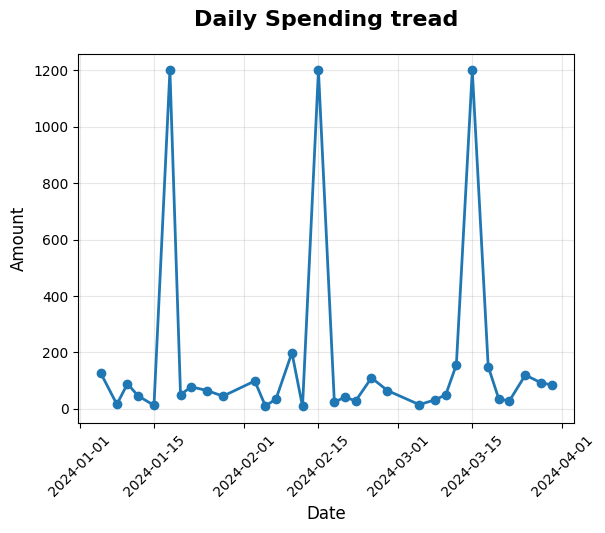

In [37]:
# Daily spending Trend
daily_spending =  expense_df.groupby('Date')['Amount'].sum().sort_index()

plt.Figure(figsize=(12,6))

plt.plot(daily_spending.index,daily_spending.values,
         marker='o',linestyle='-',linewidth=2,markersize=6)

plt.title('Daily Spending tread', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.grid(True,alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [48]:
# Generate comprehensive report
report = f"""
            PERSONAL FINANCE ANALYSIS REPORT
            Period : {df['Date'].min().strftime('%B %Y')} - {df['Date'].max().strftime('%B %Y')}

INCOME AND EXPENSES

Total Income: {total_income:>12,.2f}
Total Expense: {total_expense:>12,.2f}
Net Savings: {net_saving:>12,.2f}
Savings Rate: {(net_saving/total_income*100):>11.1f}%

SPENDING BREAKDOWN

Highest Category:    {category_spending.index[0]}   {category_spending.iloc[0]:,.2f}
Lowest Category:    {category_spending.index[-1]}   {category_spending.iloc[-1]:,.2f}
Average Per Transaction:    {expense_df['Amount'].mean():>12,.2f}
Largest Single Expense:     {expense_df['Amount'].max():>12,.2f}

MONTHLY ANALYSIS

Average Monthly Spending:   {monthly_spending.mean():>12,.2f}
Highest Month:      {monthly_spending.idxmax()}     {monthly_spending.max():,.2f}
Lowest Month:       {monthly_spending.idxmin()}     {monthly_spending.min():,.2f}

TOP 3 SPENDING CATEGORIES

1. {category_spending.index[0]:<20}     {category_spending.iloc[0]:>10,.2f}         ({category_spending.iloc[0]/total_expense*100:.1f}%)

2.{category_spending.index[1]:<20}      {category_spending.iloc[1]:>10,.2f}         ({category_spending.iloc[1]/total_expense*100:.1f}%)

3. {category_spending.index[2]:<20}     {category_spending.iloc[2]:>10,.2f}      ({category_spending.iloc[2]/total_expense*100:.1f}%)

INSIGHTS AND RECOMMENDATIONS:

You saved {(net_saving/total_income*100):.1f} % of your income.
{category_spending.index[0]} is your largest expense category
You made {len(expense_df)} transactions over {df['Date'].dt.date.nunique()} Days
Consider reviewing {category_spending.index[0]} expenses for potential saving.
"""

print(report)



            PERSONAL FINANCE ANALYSIS REPORT
            Period : January 2024 - March 2024

INCOME AND EXPENSES

Total Income:     7,500.00
Total Expense:     5,511.26
Net Savings:     1,988.74
Savings Rate:        26.5%

SPENDING BREAKDOWN

Highest Category:    Housing   3,600.00
Lowest Category:    Transportation   118.50
Average Per Transaction:          172.23
Largest Single Expense:         1,200.00

MONTHLY ANALYSIS

Average Monthly Spending:       1,837.09
Highest Month:      March     1,964.29
Lowest Month:       January     1,727.23

TOP 3 SPENDING CATEGORIES

1. Housing                    3,600.00         (65.3%)

2.Groceries                     491.05         (8.9%)

3. Utilities                    281.00      (5.1%)

INSIGHTS AND RECOMMENDATIONS:

You saved 26.5 % of your income.
Housing is your largest expense category
You made 32 transactions over 35 Days
Consider reviewing Housing expenses for potential saving.

